In [1]:
##importing the necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from scipy import stats
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
##importing the bank load data through pandas read csv
loandf = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')

In [3]:
#printing the data sample
loandf.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [4]:
## Loan data contains the below parameters
#Customer ID,Customer's age in completed years,#years of professional experience,Annual income of the customer ($000)
# Home Address ZIP code.Family size of the customer,Avg. spending on credit cards per month ($000),Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
#Value of house mortgage if any.($000),Did this customer accept the personal loan offered in the last campaign?
#Does the customer have a securities account with the bank?Does the customer have a certificate of deposit (CD) account with the bank?
#Does the customer use internet banking facilities?Does the customer use a credit card issued by UniversalBank?


In [5]:
##checking the shape, datatype of load dataset
print('shape of the loan dataset is:')
print(loandf.shape)
print('Datatype of the loan dataset is:')
print(loandf.dtypes)


shape of the loan dataset is:
(5000, 14)
Datatype of the loan dataset is:
ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object


In [6]:
##we can observe that there are 5000 rows and 13 columns in loan dataset
##We can see that there are no categorical column in the loan data sets.All the columns ar numerical and CCAVG column in float datatype

In [7]:
##checking if the dataset contains any null value
loandf.isnull().sum().sum()
##loan dataset does not contain any null values

0

In [8]:
##univariate anaysis of load dataset
loandf.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [9]:
# Observation :
##we can find mean median, minimum, maximum 25% , 75% and maximum value of 13 features

## Age and experience mean and median are almost equal which shows normal distribution
## we could find negative minimum value for Experience field . It shows that there are customers with fake experience. these records should be corrected

In [10]:
##finding the number of negative experience records
loandf[loandf['Experience'] < 0 ]['Experience'].count()

52

(array([192., 592., 505., 581., 524., 660., 663., 501., 586., 196.]),
 array([-3. ,  1.6,  6.2, 10.8, 15.4, 20. , 24.6, 29.2, 33.8, 38.4, 43. ]),
 <a list of 10 Patch objects>)

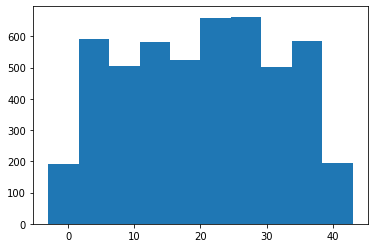

In [11]:
##plotting experience variables
plt.hist(loandf['Experience'])

In [12]:

negexpdf = loandf.loc[loandf['Experience'] < 0 ]

In [13]:
##printing the records with negativeexperience
negexpdf


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [14]:
##finding median with only positive experience to replace those values with negative experience data
posexpdf = loandf.loc[loandf['Experience'] > 0 ]
medianval = posexpdf['Experience'].median()

In [15]:
## replacing the median of positive Experience in loan data where negative experience is found
loandf['Experience'] = loandf['Experience'].apply(lambda x: medianval if x < 0 else x)
##loandf[loandf['Experience']  < 0 ] = medianval
loandf

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1.0,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19.0,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15.0,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9.0,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8.0,45,91330,4,1.00,2,0,0,0,0,0,1
5,6,37,13.0,29,92121,4,0.40,2,155,0,0,0,1,0
6,7,53,27.0,72,91711,2,1.50,2,0,0,0,0,1,0
7,8,50,24.0,22,93943,1,0.30,3,0,0,0,0,0,1
8,9,35,10.0,81,90089,3,0.60,2,104,0,0,0,1,0
9,10,34,9.0,180,93023,1,8.90,3,0,1,0,0,0,0


In [16]:
## verifying if loan data contains negative value
loandf[loandf['Experience'] < 0 ]['Experience'].count()
## the experience with negative values are replaced

0

In [17]:
##printing sample after replacin experience with median
loandf.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1.0,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19.0,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8.0,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13.0,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27.0,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24.0,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10.0,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9.0,180,93023,1,8.9,3,0,1,0,0,0,0


In [18]:
##using univariate analysis to cross check the minimum value of Experience column
loandf.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.33800,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.25319,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.00000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,11.00000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,21.00000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.00000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.00000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [19]:
loandf.corr()
## we could not find any significant correlation of features with target variable personal loan. 
## could observe income field has little correlation with target variable whose correlation is 0.5024

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.009386,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.975489,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.009386,0.975489,1.000000,-0.049123,-0.028453,-0.045149,-0.048616,0.018289,-0.013482,-0.014314,-0.000432,0.005292,0.013422,0.008823
Income,-0.017695,-0.055269,-0.049123,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028453,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.045149,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.048616,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.018289,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.013482,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.014314,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


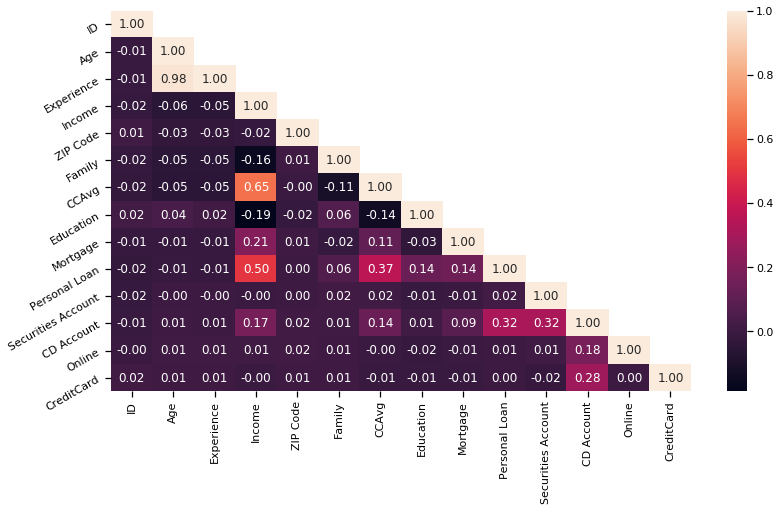

In [20]:
#sns.heatmap(loandf.corr())
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(loandf.corr())
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(loandf.corr(),mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)
## we can observe that income age and experience are highly correlated and income and CCAvg are moderately correlated
##income is moderately correlated with Personal Loan

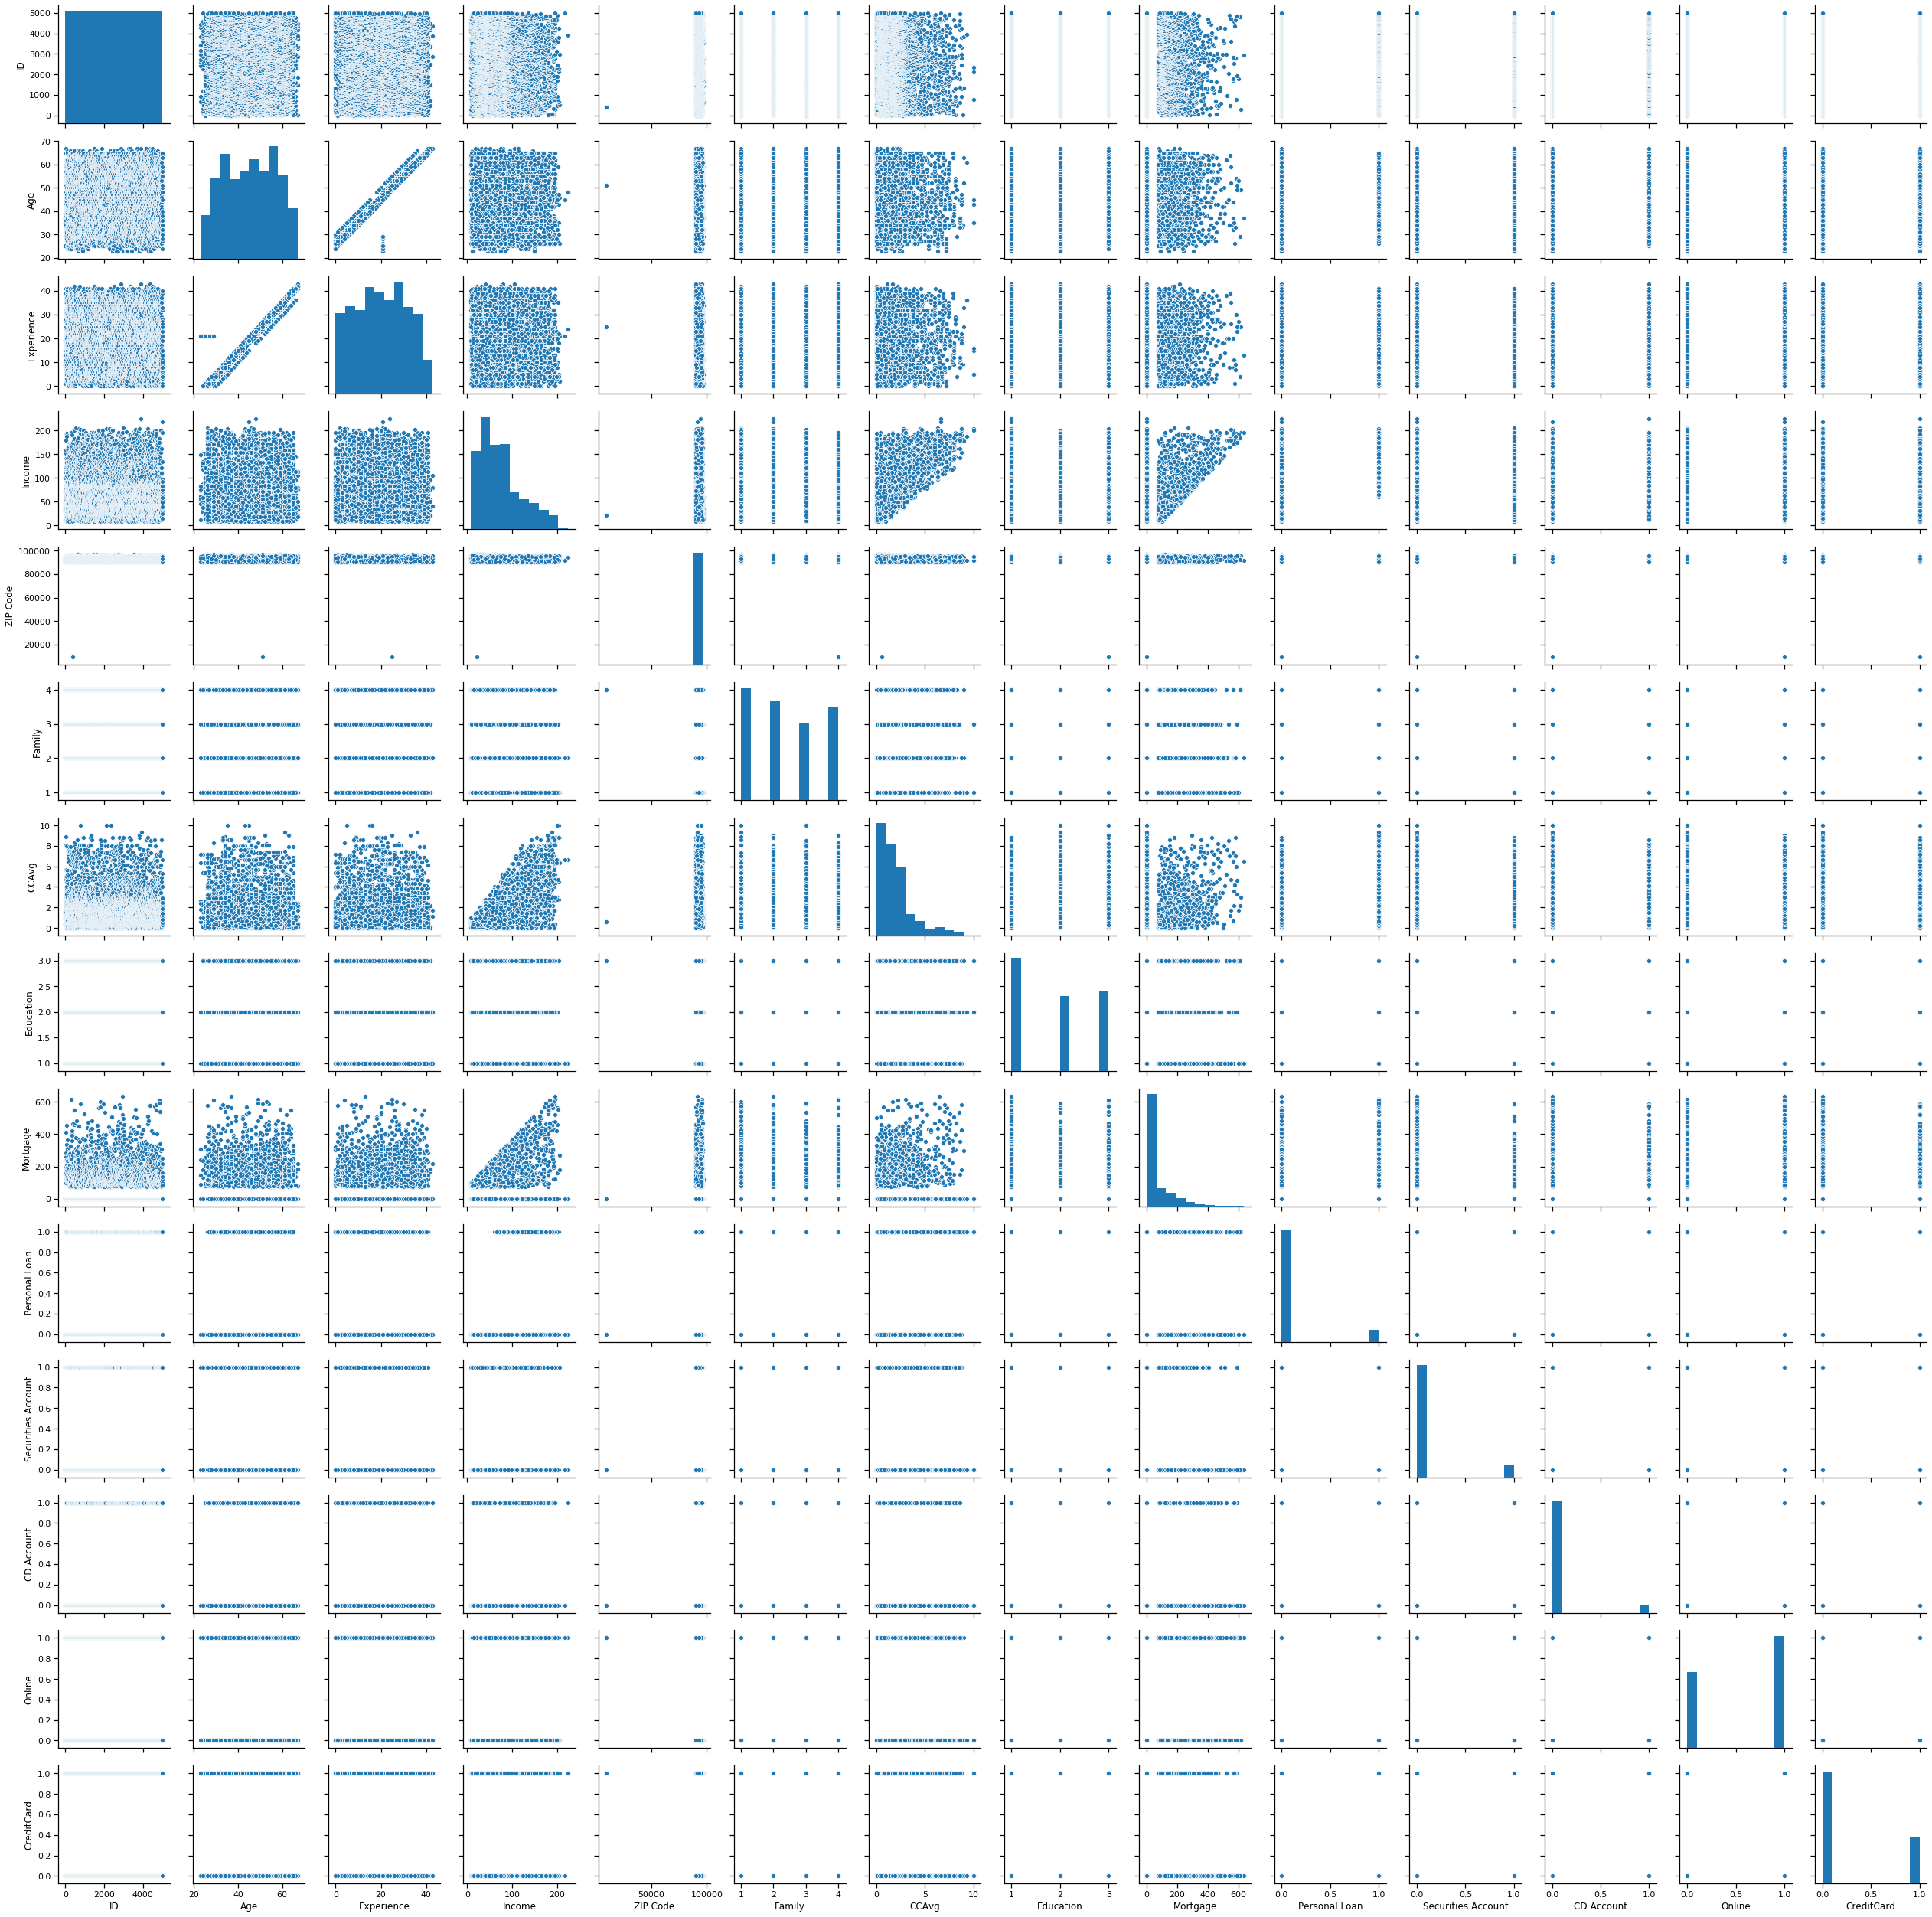

In [21]:
##bivariate analysis 

sns.pairplot(loandf)

In [22]:
##Observations:
# Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age. We can confirm this by looking at the describe statement above, which shows mean is almost equal to median
# Experience is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to median. .
# Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median
# CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K
# Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K
# The variables family and education are ordinal variables. The distribution of families is evenly distributes


Text(0.5, 1.0, 'Age Distribution')

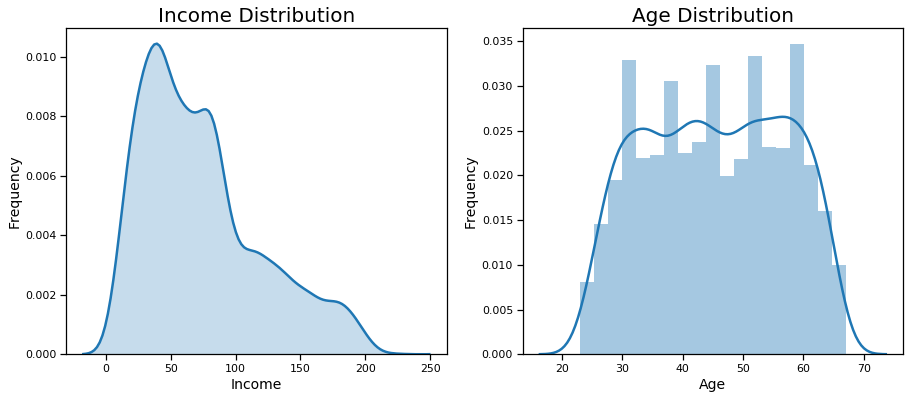

In [23]:
## Distribution of each variable 
fig, (ax21,ax22) = plt.subplots(1,2)
fig.set_size_inches(15,6)

#Create a density curve of the Income distribution
sns.kdeplot(loandf['Income'], ax = ax21, shade=True, legend=False)
ax21.set_xlabel("Income", fontsize=14)
ax21.set_ylabel("Frequency", fontsize=14)
ax21.set_title("Income Distribution", fontsize=20)
##Inference :Income of loan data frame is moderately normally distributed which skews towards right. most of the customers earn between 10k to 100k


#Create a histogram of the age distribution
ax22 = sns.distplot(loandf['Age'])

ax22.set_xlabel("Age", fontsize=14)
ax22.set_ylabel("Frequency", fontsize=14)
ax22.set_title("Age Distribution", fontsize=20)
## inference : Age is uniformly distributed, most of the customers age between 30 - 60 years 


Text(0.5, 1.0, 'CCAvg Distribution')

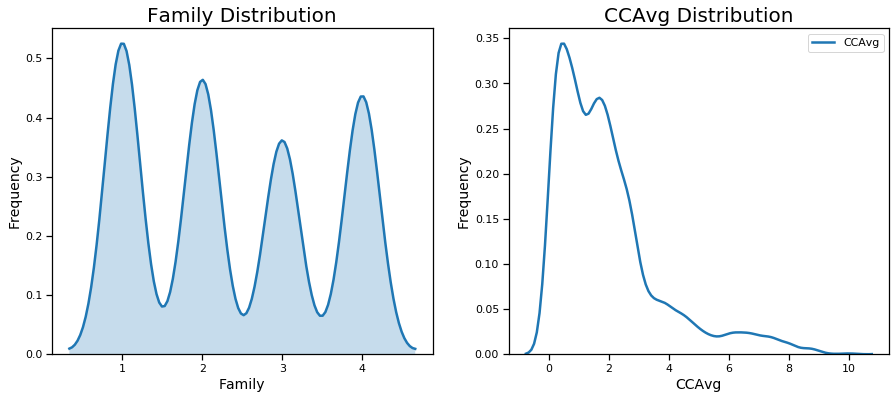

In [24]:
## Distribution of each variable 

fig, (ax21,ax22) = plt.subplots(1,2)
fig.set_size_inches(15,6)

#Create a density curve of the Family distribution
sns.kdeplot(loandf['Family'], ax = ax21, shade=True, legend=False)
ax21.set_xlabel("Family", fontsize=14)
ax21.set_ylabel("Frequency", fontsize=14)
ax21.set_title("Family Distribution", fontsize=20)
##Inference : we could observe that customer family size varies between 1 to 4

#Create a histogram of the CCAvg distribution
ax22 = sns.kdeplot(loandf['CCAvg'])
ax22.set_xlabel("CCAvg", fontsize=14)
ax22.set_ylabel("Frequency", fontsize=14)
ax22.set_title("CCAvg Distribution", fontsize=20)
## inference : CCVg is uniformly distributed and skewed towards right.On an average customer spends aroun 0 to 10k 

Text(0.5, 1.0, 'Mortgage Distribution')

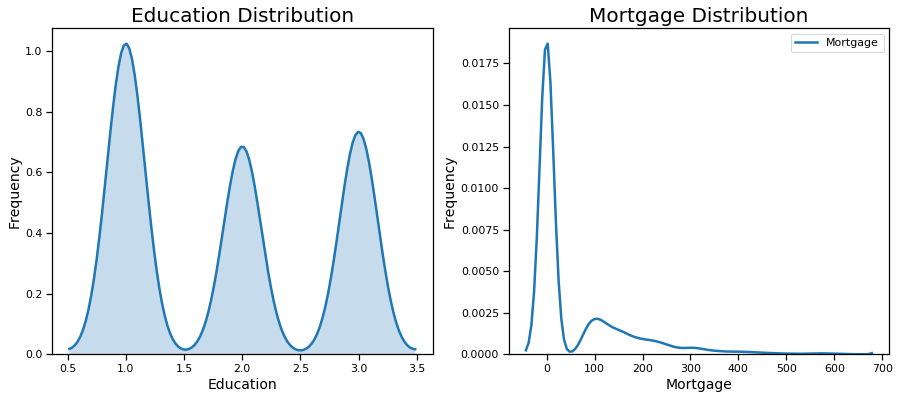

In [25]:
## Distribution of each variable 


fig, (ax21,ax22) = plt.subplots(1,2)
fig.set_size_inches(15,6)

#Create a density curve of the Family distribution
sns.kdeplot(loandf['Education'], ax = ax21, shade=True, legend=False)
ax21.set_xlabel("Education", fontsize=14)
ax21.set_ylabel("Frequency", fontsize=14)
ax21.set_title("Education Distribution", fontsize=20)
##Inference : Bank has customers with different qualifiicatin, majority of the customers are undergraduate followed by professional and followed by graduate


#Create a histogram of the CCAvg distribution
ax22 = sns.kdeplot(loandf['Mortgage'])

ax22.set_xlabel("Mortgage", fontsize=14) 
ax22.set_ylabel("Frequency", fontsize=14)
ax22.set_title("Mortgage Distribution", fontsize=20)
## inference : Mortgage is uniformly distributed and skewed towards right. Most of the customers does not have mortgage,few of the customers mortgage varies between 50 -650k


(-1.1193576104661833,
 1.1137046780974882,
 -1.1127149695691048,
 1.100605505530989)

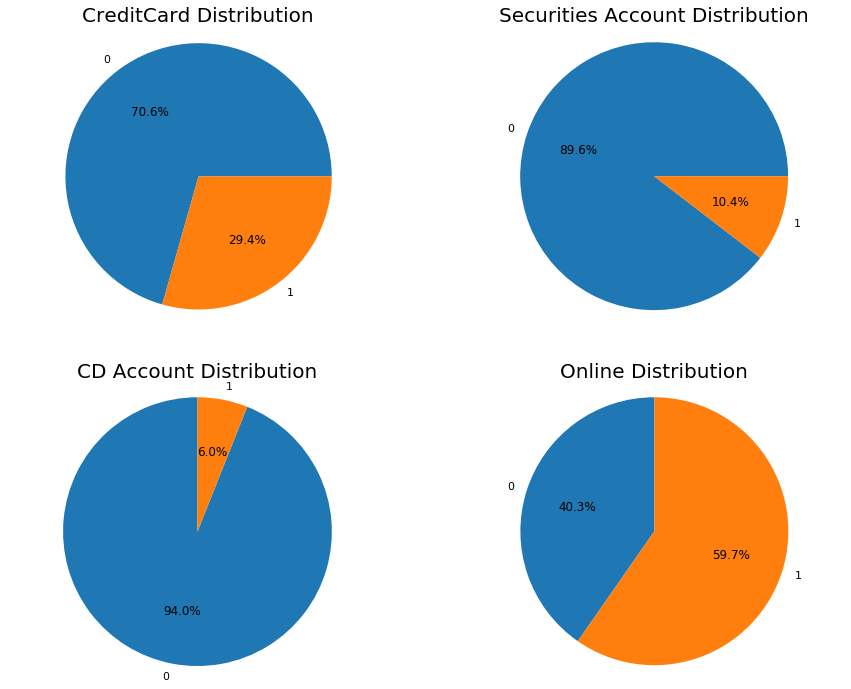

In [26]:
##prepare subplots, with 2 columns and 2 rows
## We could find the distribution of securities account, CD accunt, Online and credit card distribution
fig1, ((ax11,ax12),(ax13,ax14)) = plt.subplots(2,2)
#set full plot size
fig1.set_size_inches(15,12)
ax11.pie(loandf.groupby("CreditCard").size().values, labels=loandf.groupby("CreditCard").size().keys(), autopct='%1.1f%%')
ax11.set_title("CreditCard Distribution", fontsize=20)
ax11.axis('equal')
#Create a pie chart of the Securities Account distribution
ax12.pie(loandf.groupby("Securities Account").size().values, labels=loandf.groupby("Securities Account").size().keys(), autopct="%1.1f%%")
ax12.set_title("Securities Account Distribution", fontsize=20)
ax12.axis('equal')
#Create a pie chart of the CD Account distribution
ax13.pie(loandf.groupby("CD Account").size().values, labels=loandf.groupby("CD Account").size().keys(), autopct='%1.1f%%', startangle=90)
ax13.set_title("CD Account Distribution", fontsize=20)
ax13.axis('equal')
#Create a pie chart of the Online distribution
ax14.pie(loandf.groupby("Online").size().values, labels=loandf.groupby("Online").size().keys(), autopct='%1.1f%%', startangle=90)
ax14.set_title("Online Distribution", fontsize=20)
ax14.axis('equal')

In [27]:
#Observations:
## 29.4 % customers hold credit cards issued by universal bank.10.4% customers have securities account with the bank
##6% customers have certificate od Deposit account with the bank.
##59.7% cutomers have internet bank facilities

Text(0.5, 1.0, 'Personal Loan Distribution')

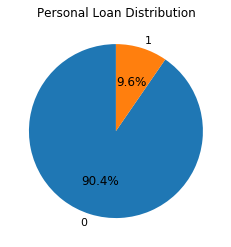

In [28]:
plt.pie(loandf.groupby("Personal Loan").size().values, labels=loandf.groupby("Personal Loan").size().keys(), autopct='%1.1f%%', startangle=90)
plt.title("Personal Loan Distribution")
## we could find that only 9.6 % of customers has been converted to loan customers in Thera bank
## distribution of target column
    

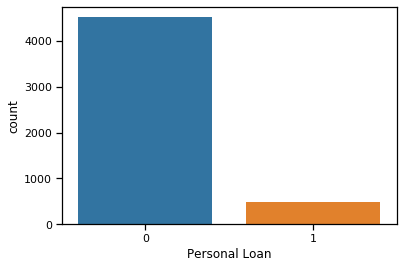

In [29]:
sns.countplot(loandf['Personal Loan'])
## we could find that person who has taken loan are relatively small compared to person who has not taken loan

In [30]:
# Lets find what attributes contribute towards individual taking personal loan in the past

In [31]:
#predicting how does income contributes in predicting whether person takes loan or not

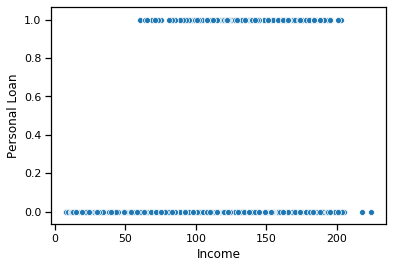

In [32]:
sns.scatterplot(x= loandf['Income'], y = loandf['Personal Loan'])
#we could observe that when the income is low, the chances of taking personal loan is very low. But when the income increases the chances of taking personal loan increases with few outliers

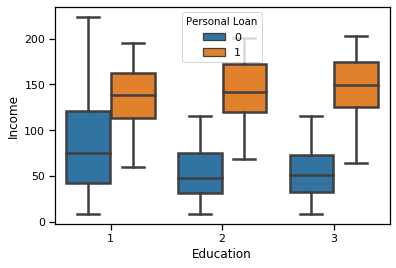

In [33]:
##Predicting how does Education and Income contributes in person taking personal loan or not
sns.boxplot(x = 'Education', y = 'Income' , hue = 'Personal Loan', data = loandf)


In [34]:
#Observation:
#The box plots show that those with education level 1 have higher incomes. But customers who go for personal loans have the same income distribution regardless of the education level.

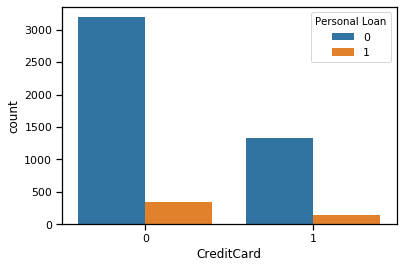

In [35]:
## association of credit card with the dependent variable 
sns.countplot(x="CreditCard", data=loandf, hue = "Personal Loan")

In [36]:
##Observation : Majority of the customer who does not have loan does not have credit card as well. Few of the customer who has taken loan has credit card

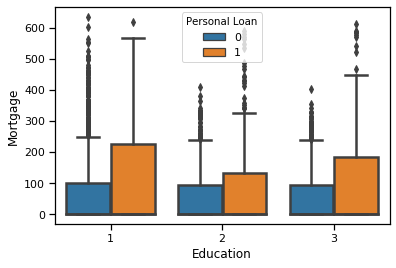

In [37]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=loandf)


In [38]:
#Observation:
# From the box plot We can observe that Customers who hastaken loan also have higher mortgages.

In [39]:
## Predicting how much family size  influence in taking personal loan

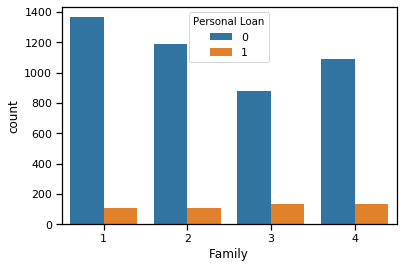

In [40]:
sns.countplot(x="Family", data=loandf, hue="Personal Loan")

In [41]:
##we could observe that Family size does not play significant role in predicting personal loan taken by a person

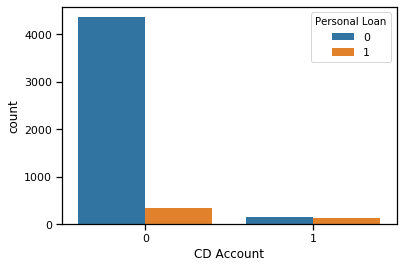

In [42]:
##association of CD with personal loan
sns.countplot(x="CD Account", data=loandf,hue="Personal Loan")


In [43]:
## Observation: Mjority of the customer who does not have CD account have not taken loan. But, there are equal number of customers with certificate of deposit who has availed and not availed loans 

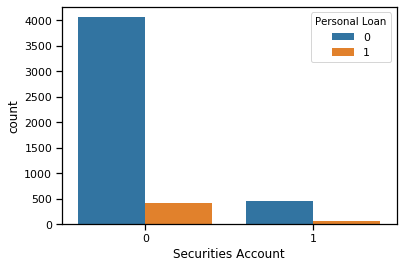

In [44]:
##association of securities account in identifying personal loan
sns.countplot(x="Securities Account", data=loandf,hue="Personal Loan")

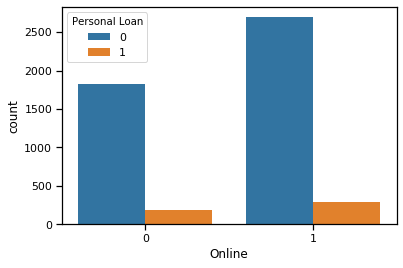

In [45]:
##association of online account in identifying personal loan
sns.countplot(x="Online", data=loandf,hue="Personal Loan")

In [46]:
##Observation: The majority customers who have taken loan have Online account. Also there are few customers who have online account but have not taken loan

In [47]:
##Observation:
##Majority of the customers who does not have personal loan have securities account

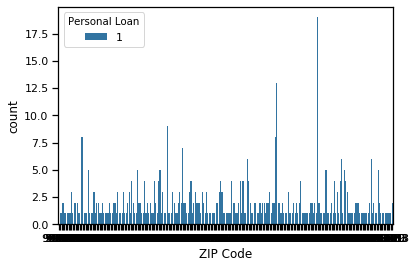

In [48]:
sns.countplot(x="ZIP Code", data=loandf[loandf['Personal Loan']==1], hue ="Personal Loan")

## distribution of zip code

In [49]:
##top 10 places where customers has availed loan
loandf[loandf['Personal Loan']==1]['ZIP Code'].value_counts().head(10)

94720    19
94305    13
92093     9
90095     8
90089     8
94304     8
92182     7
94022     6
95051     6
95616     6
Name: ZIP Code, dtype: int64

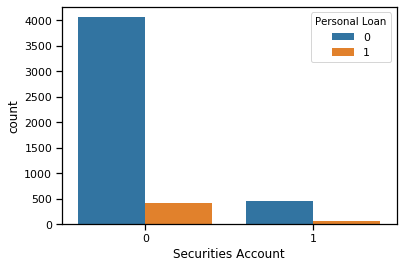

In [50]:
sns.countplot(x="Securities Account", data=loandf,hue="Personal Loan")
##Securities account is not good predictor of personal loan availing ratio

Text(0, 0.5, 'Age')

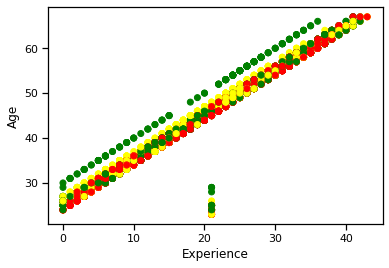

In [51]:
fig, ax = plt.subplots()
colors = {1:'red',2:'yellow',3:'green'}
ax.scatter(loandf['Experience'],loandf['Age'],c=loandf['Education'].apply(lambda x:colors[x]))
plt.xlabel('Experience')
plt.ylabel('Age')

In [52]:
##Observation:
# The above plot show with experience and age have a positive correlation. As experience increase age also increases. Also the colors show the education level. There is gap in the mid forties of age and also more people in the under graduate level

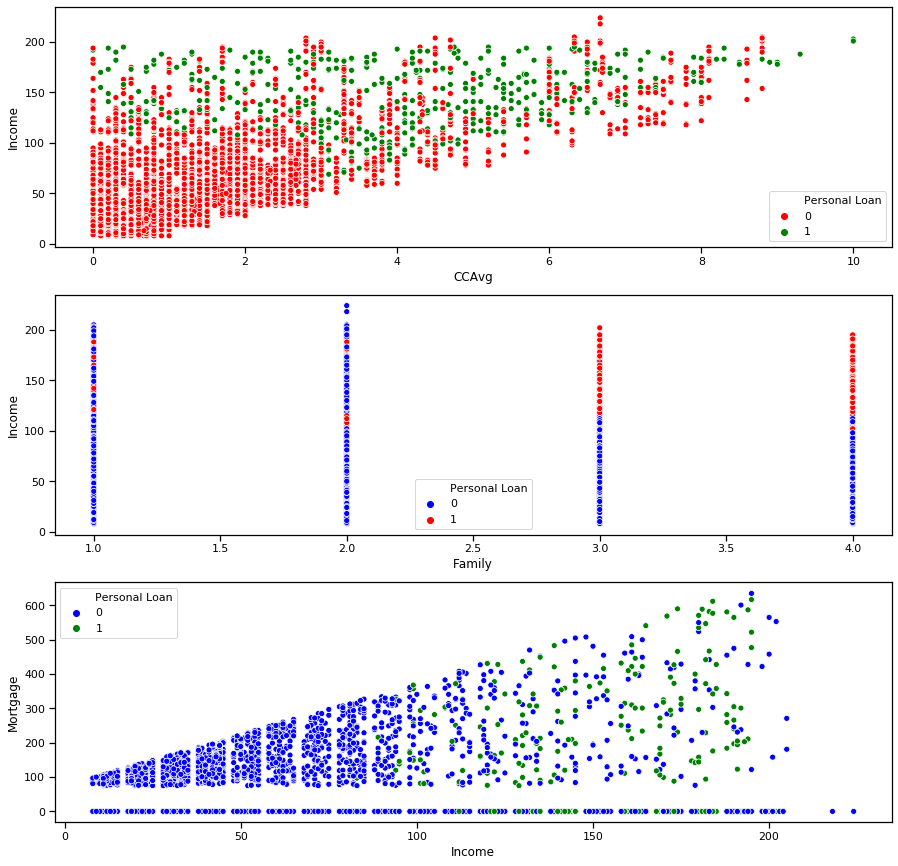

In [53]:
##few Distribution using scatter plot
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
sns.scatterplot(loandf.CCAvg, loandf.Income, hue = loandf['Personal Loan'], palette= ['red','green'])

plt.subplot(3,1,2)
sns.scatterplot(loandf.Family, loandf.Income, hue = loandf['Personal Loan'], palette= ['blue','red'])

plt.subplot(3,1,3)
sns.scatterplot(loandf.Income, loandf.Mortgage, hue = loandf['Personal Loan'], palette= ['blue','green'])

In [54]:
##Observation:
##With increase in income,the credit card average increases
#Family with size 3 and 4 has taken more personal loan the family size with 1 and 2
##With increase in income, mortgage increases with necessity of personal loan

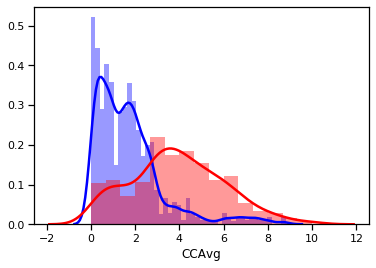

In [55]:
sns.distplot(loandf[loandf['Personal Loan'] == 0]['CCAvg'], color = 'b')
sns.distplot( loandf[loandf['Personal Loan'] == 1]['CCAvg'], color = 'r')


In [56]:
#Observation:
##Customers who have taken personal loan have higher credit card average than those who did not take. So high credit card average seems to be good predictor of whether or not a customer will take a personal loan.

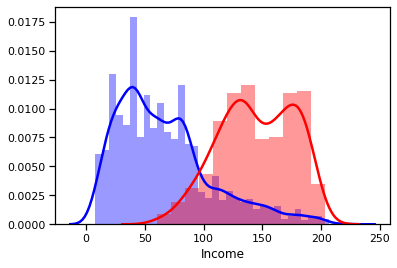

In [57]:
sns.distplot(loandf[loandf['Personal Loan'] == 0]['Income'], color = 'b')
sns.distplot(loandf[loandf['Personal Loan'] == 1]['Income'], color = 'r')


In [58]:
##Observation:
##we can observe that when the income increases, the chances of taking loan increases with few outliers, which means some customers with more income has not availed loan as well

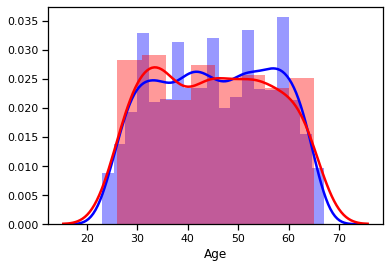

In [59]:
sns.distplot(loandf[loandf['Personal Loan'] == 0]['Age'], color = 'b')
sns.distplot(loandf[loandf['Personal Loan'] == 1]['Age'], color = 'r')
##Age is not a good feature in predicting the dependent variable as it has overlapping curve. customers with different ages have both taken loan as well as not taken loan

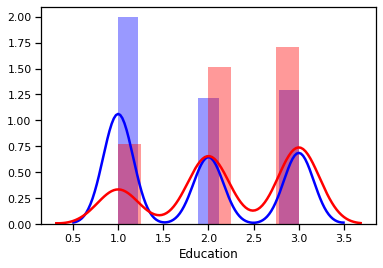

In [60]:
sns.distplot(loandf[loandf['Personal Loan'] == 0]['Education'], color = 'b')
sns.distplot(loandf[loandf['Personal Loan'] == 1]['Education'], color = 'r')


In [61]:
#Observation:
##customers who are undergraduate have not taken loan mostly. Maximum customers who have availed loan are professionals followed by graduate

In [62]:
## splitting data into training and testing
## dropping the id field as it has no meaningful value in predicting the target variable
##experience is highly correlated with age hence dropping one of the variable between two highly correalted variable
loandf.drop(['ID','Experience'], axis= 1 , inplace = True)
print(loandf.head(5))


   Age  Income  ZIP Code  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25      49     91107       4    1.6          1         0              0   
1   45      34     90089       3    1.5          1         0              0   
2   39      11     94720       1    1.0          1         0              0   
3   35     100     94112       1    2.7          2         0              0   
4   35      45     91330       4    1.0          2         0              0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1  


In [63]:
X = np.array(loandf.drop(['Personal Loan'] , axis = 1))
y = np.array(loandf['Personal Loan'])


In [64]:
X_train , X_test, y_train , y_test = train_test_split(X, y , test_size=0.30 , random_state=5)

In [65]:
##predicting accuracy of three algorithm without scaling data

In [66]:
%%time

#initialize the model

knn = KNeighborsClassifier(n_neighbors= 13, weights = 'uniform', metric='euclidean')
 # fit the model
knn.fit(X_train, y_train)    
 # make predictions
y_KNNpred = knn.predict(X_test)
y_KNNtrainpred = knn.predict(X_train) 
score = metrics.accuracy_score(y_test, y_KNNpred)
##end = t.clock()
##KNNtime = end-start
##print('Time taken for execution of KNN is')
##print(format(KNNtime))
# get accuracy

print('Training Accuracy score using knn is')
print(round(metrics.accuracy_score(y_train, y_KNNtrainpred)*100))
print('Testing Accuracy score using knn is',round(score*100))

# determining best k
## the accuracy score with N nieghbors 13 is 90 %


Training Accuracy score using knn is
91.0
Testing Accuracy score using knn is 90.0
Wall time: 1.19 s


Confusion matrics using KNN is


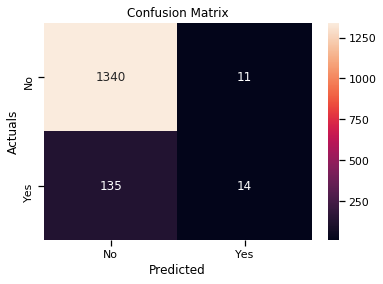

In [69]:
##finding the confusion matriz using k nieghbours algorithm for 2 class classification problem
cm = metrics.confusion_matrix(y_test,y_KNNpred)
print('Confusion matrics using KNN is')
class_label = ["No", "Yes"]
loandf_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(loandf_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actuals")
plt.show()

In [70]:
##Observation:
##The KNN has predicted 1340,14(True Negative, True positive) correctly that who will be taking loan and not taking loan out of 1500 records
##Also there are false prediction of 11,135 (False positive, False Negative)records who will be taking loan and not taking loan

In [71]:
## finding accuracy score using logistic regression

In [72]:
%%time
#startlog  = t.clock()
model = LogisticRegression()
model.fit(X_train,y_train)
##predicting testing output
y_LOGpred = model.predict(X_test)
##predicting training output
y_LOGtrainpred = model.predict(X_train)
score_train = metrics.accuracy_score(y_train,y_LOGtrainpred)
score_test = metrics.accuracy_score(y_test,y_LOGpred)
##endlog = t.clock()
##logtime = endlog-startlog
##print('Time taken for execution of Logistic regression is')
##print(format(logtime))
print('training accuracy using logistic regression is',round(score_train*100))
print('testing accuracy using logistic regression is',round(score_test*100))

training accuracy using logistic regression is 91.0
testing accuracy using logistic regression is 91.0
Wall time: 5.5 s
Parser   : 114 ms


Confusion matrics using Logistic Regression is


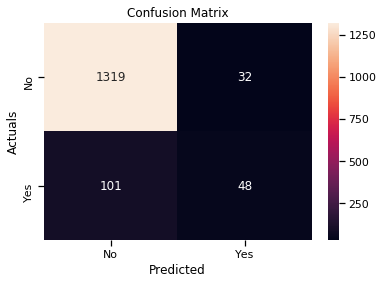

In [73]:
cm = metrics.confusion_matrix(y_test,y_LOGpred)
print('Confusion matrics using Logistic Regression is')
class_label =  ["No", "Yes"]
loandf_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(loandf_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actuals")
plt.show()

In [74]:
##Observation:
##The Logistic regression has predicted 1319,48 (True Negative, True Positive)correctly that who will be taking loan and not taking loan out of 1500 records
##Also there are false prediction of 101,32 (false positive, false Negative)records who will be taking loan and not taking loan

In [92]:
%%time
##model evaluation using Naive Bayes theorem
##startnaive = t.clock()
naivemodel = GaussianNB()
naivemodel.fit(X_train, y_train)
##predicting training and testing accuracy
y_trainpred = naivemodel.predict(X_train)
y_pred = naivemodel.predict(X_test)
naivescore_train = metrics.accuracy_score(y_train,y_trainpred)
naivescore_test = metrics.accuracy_score(y_test,y_pred)
##endnaive = t.clock()
##naivetime  = endnaive-startnaive
##print('Time taken for execution of naive bayes is')
##print(format(naivetime))
print('training accuracy using Naive bayes regression is',round(naivescore_train*100))
print('testing accuracy using Naive bayes regression is',round(naivescore_test*100))

training accuracy using Naive bayes regression is 89.0
testing accuracy using Naive bayes regression is 88.0
Wall time: 8.98 ms


confusion matrix using Naive algorithm is


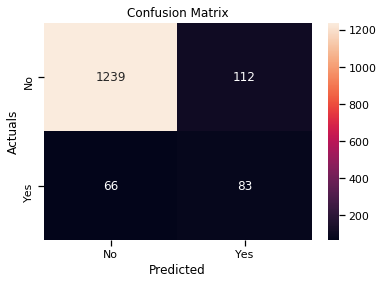

In [76]:
cm = metrics.confusion_matrix(y_test,y_pred)
print('confusion matrix using Naive algorithm is')

class_label = ["No", "Yes"]
loandf_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(loandf_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actuals")
plt.show()

In [77]:
##Observation:
##The Naive Bayes has predicted 1239,83 (True Negative, True Positive) correctly that who will be taking loan and not taking loan out of 1500 records
##Also there are false prediction of 112,66 (false positive, false Negative) records who will be taking loan and not taking loan

In [78]:
##finding classification report for naive bayes algorithm is
print('classification report using Naive Bayes algorithm is')
print(metrics.classification_report(y_test,y_pred))


classification report using Naive Bayes algorithm is
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1351
           1       0.43      0.56      0.48       149

    accuracy                           0.88      1500
   macro avg       0.69      0.74      0.71      1500
weighted avg       0.90      0.88      0.89      1500



In [79]:
##finding classification report for Logistic regression
print('classification report using Logistic regression is')
print(metrics.classification_report(y_test,y_LOGpred))

classification report using Logistic regression is
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1351
           1       0.60      0.32      0.42       149

    accuracy                           0.91      1500
   macro avg       0.76      0.65      0.69      1500
weighted avg       0.90      0.91      0.90      1500



In [80]:
##finding classification report for KNN algorithm is
print('classification report using KNN algorithm is')
print(metrics.classification_report(y_test,y_KNNpred))


classification report using KNN algorithm is
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1351
           1       0.56      0.09      0.16       149

    accuracy                           0.90      1500
   macro avg       0.73      0.54      0.55      1500
weighted avg       0.87      0.90      0.87      1500



In [81]:
##Iteration two:  predicting model accuracy with scaled data


In [82]:
##scaling the feature
sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train)
scaled_X_test = sc.fit_transform(X_test)

In [83]:
%%time
#predicting score with scaled features
#initialize the model
##start  = t.clock()
knn = KNeighborsClassifier(n_neighbors= 13, weights = 'uniform', metric='euclidean')
 # fit the model
knn.fit(scaled_X_train, y_train)    
 # make predictions
y_KNNpred = knn.predict(scaled_X_test)
y_KNNtrainpred = knn.predict(scaled_X_train) 
score = metrics.accuracy_score(y_test, y_KNNpred)
##end = t.clock()
##KNNtime = end-start
##print('Time taken for execution of KNN is')
##print(format(KNNtime))
# get accuracy

print('Training Accuracy score using knn is')
print(round(metrics.accuracy_score(y_train, y_KNNtrainpred)*100))
print('Testing Accuracy score using knn is',round(score*100))

# determining best k
## the accuracy score with N nieghbors 13 is 94 %


Training Accuracy score using knn is
96.0
Testing Accuracy score using knn is 94.0
Wall time: 1.55 s


Confusion matrics of train data using KNN is


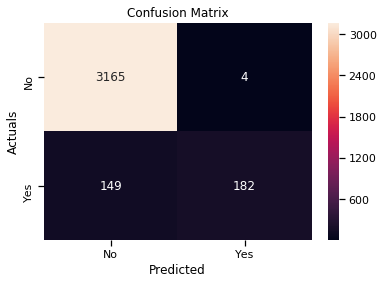

In [97]:
##finding the confusion matriz using k nieghbours algorithm for 2 class classification problem
cm = metrics.confusion_matrix(y_train,y_KNNtrainpred)
print('Confusion matrics of train data using KNN is')
class_label = ["No", "Yes"]
loandf_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(loandf_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actuals")
plt.show()

Confusion matrics of test data using KNN is


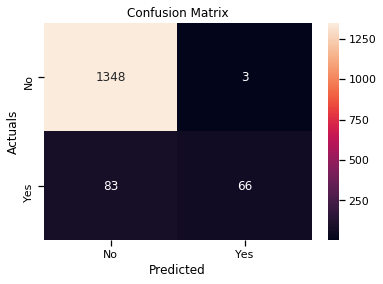

In [98]:
##finding the confusion matriz using k nieghbours algorithm for 2 class classification problem
cm = metrics.confusion_matrix(y_test,y_KNNpred)
print('Confusion matrics of test data using KNN is')
class_label = ["No", "Yes"]
loandf_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(loandf_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actuals")
plt.show()

In [85]:
##Observation:
##The KNN has predicted 1348,66(True Negative, True positive) correctly that who will be taking loan and not taking loan out of 1500 records
##Also there are false prediction of 3,83 (False positive, False Negative)records who will be taking loan and not taking loan
## False positive and false negative gives misclassification error  which is 86


In [86]:
%%time
##startlog  = t.clock()
model = LogisticRegression()
model.fit(scaled_X_train,y_train)
##predicting testing output
y_LOGpred = model.predict(scaled_X_test)
##predicting training output
y_LOGtrainpred = model.predict(scaled_X_train)
score_train = metrics.accuracy_score(y_train,y_LOGtrainpred)
score_test = metrics.accuracy_score(y_test,y_LOGpred)
##endlog = t.clock()
##logtime = endlog-startlog
##print('Time taken for execution of Logistic regression is')
##print(format(logtime))
print('training accuracy using logistic regression is',round(score_train*100))
print('testing accuracy using logistic regression is',round(score_test*100))

training accuracy using logistic regression is 95.0
testing accuracy using logistic regression is 95.0
Wall time: 16 ms


Confusion matrics of train data using Logistic Regression is


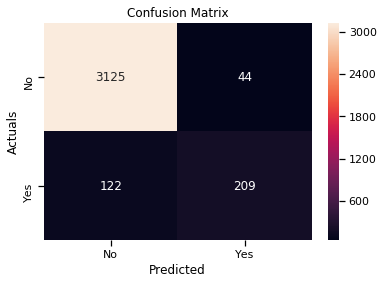

In [99]:
cm = metrics.confusion_matrix(y_train,y_LOGtrainpred)
print('Confusion matrics of train data using Logistic Regression is')
class_label = ["No", "Yes"]
loandf_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(loandf_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actuals")
plt.show()

Confusion matrics of test data using Logistic Regression is


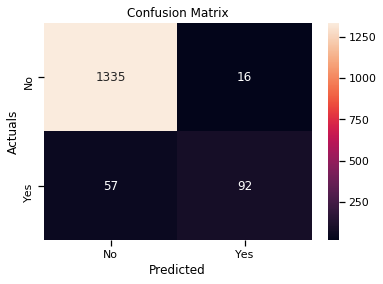

In [100]:
cm = metrics.confusion_matrix(y_test,y_LOGpred)
print('Confusion matrics of test data using Logistic Regression is')
class_label = ["No", "Yes"]
loandf_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(loandf_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actuals")
plt.show()

In [88]:
##Observation:
##The Logistic regression has predicted 1335,92 (True Negative , True positive)correctly that who will be taking loan and not taking loan out of 1500 records
##Also there are false prediction of 16,57 (False postive , fale negative) records who will be taking loan and not taking loan
## False positive and false negative gives misclassification error  which is 73


In [89]:
%%time
##model evaluation using Naive Bayes theorem
##startnaive = t.clock()
naivemodel = GaussianNB()
naivemodel.fit(scaled_X_train, y_train)
##predicting training and testing accuracy
y_trainpred = naivemodel.predict(scaled_X_train)
y_pred = naivemodel.predict(scaled_X_test)
naivescore_train = metrics.accuracy_score(y_train,y_trainpred)
naivescore_test = metrics.accuracy_score(y_test,y_pred)
##endnaive = t.clock()
##naivetime  = endnaive-startnaive
##print('Time taken for execution of naive bayes is')
##print(format(naivetime))
print('training accuracy using Naive bayes regression is',round(naivescore_train*100))
print('testing accuracy using Naive bayes regression is',round(naivescore_test*100))

training accuracy using Naive bayes regression is 88.0
testing accuracy using Naive bayes regression is 88.0
Wall time: 15 ms


confusion matrix of train data using Naive algorithm for training data is


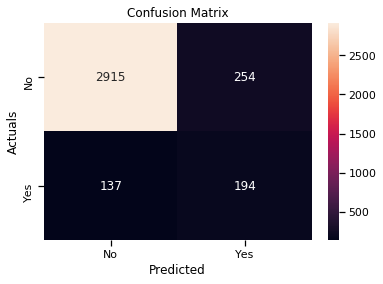

In [101]:
cm = metrics.confusion_matrix(y_train,y_trainpred)
print('confusion matrix of train data using Naive algorithm for training data is')
class_label = ["No", "Yes"]
loandf_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(loandf_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actuals")
plt.show()

confusion matrix of test data using Naive algorithm for test data is


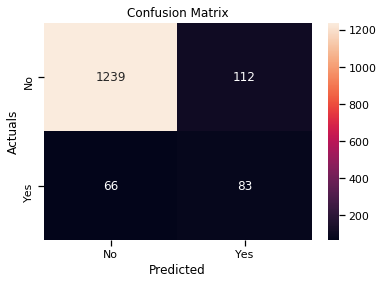

In [102]:
cm = metrics.confusion_matrix(y_test,y_pred)
print('confusion matrix of test data using Naive algorithm for test data is')
class_label = ["No", "Yes"]
loandf_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(loandf_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actuals")
plt.show()

In [91]:
##Observation:
##The Naive Bayes algorithm has predicted 1236,78 (True Negative , True Positive)correctly that who will be taking loan and not taking loan out of 1500 records
##Also there are false prediction of 115,71 (False postive , fale negative) records who will be taking loan and not taking loan
## False positive and false negative gives misclassification error  which is 178

In [90]:
##finding classification report for naive bayes algorithm is
print('classification report using naive bayes algorithm is')
print(metrics.classification_report(y_test,y_pred))


classification report using naive bayes algorithm is
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.40      0.52      0.46       149

    accuracy                           0.88      1500
   macro avg       0.67      0.72      0.69      1500
weighted avg       0.89      0.88      0.88      1500



In [91]:
##finding classification report for Logistic regression
print('classification report using Logistic regression is')
print(metrics.classification_report(y_test,y_LOGpred))

classification report using Logistic regression is
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.85      0.62      0.72       149

    accuracy                           0.95      1500
   macro avg       0.91      0.80      0.84      1500
weighted avg       0.95      0.95      0.95      1500



In [92]:
##finding classification report for KNN algorithm is
print('classification report using KNN algorithm is')
print(metrics.classification_report(y_test,y_KNNpred))


classification report using KNN algorithm is
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1351
           1       0.96      0.44      0.61       149

    accuracy                           0.94      1500
   macro avg       0.95      0.72      0.79      1500
weighted avg       0.94      0.94      0.93      1500



In [95]:
##Observations:
##From the above modeling using various algorithm we could find that the Logistic Regression gives better output for both scaled and unscaled data
# Bank modelling problem we are looking for lesser False Negative,because bank will loose Customer if there are false negative predictions
##Logistic has lesser false negative than KNN and Naive Bayes algorithm.
#In the above three models , Logistic Regression has higher accuracy of 95% followed by KNN with 94% and Naive Bayes algorithm with 88%
#Considering this we can say that logistic regression performs well with scaled data in predicting liability customer turning into loan customer
#KNN has higher recall . Logisitic Regression has higher F1 score than the other two algorithms.
#Logistic regression has lesser misclassification error
#We could finalize Logistic Regression as our model
##Reason:
#Logistic regression is parameteric model, where as knn is non parameteric model. KNN is comparatively slower than logisitic.LR can derive cnfidence level(about its prediction), whereas KNN can nly output the labels

In [96]:
##Using cross validation to predict model accuracy 

KNN: 0.898600 (0.008902)
LR: 0.908800 (0.007756)
NB: 0.885600 (0.010385)


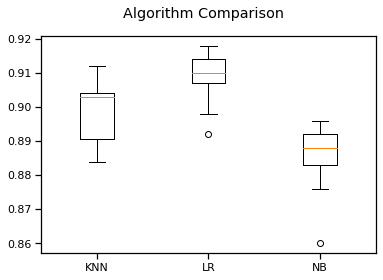

In [97]:
##Model comparison using 10 fold cross validation to predict better model
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=5)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [98]:
# Conclusion
# As the aim of the universal bank is to convert there liability customers into loan customers. They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data. Four classification algorithms were used in this study.
##From the above graph ,we can observe logistic algorithm performs  better than KNN and Naive Bayes lgorithm and  has very low variance compared to KNN and Naive Bayes algorithm
##considering the accuracy, execuion time we can choose Logistic Regression as our final model